<a href="https://colab.research.google.com/github/MamidiPravallikaReddy/ML-LAB/blob/main/ML_week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Implement K- means algorithm to find the clusters. (also demonstrate with elbow method)

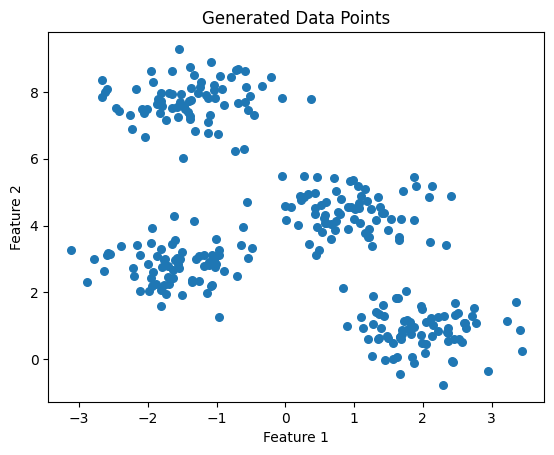

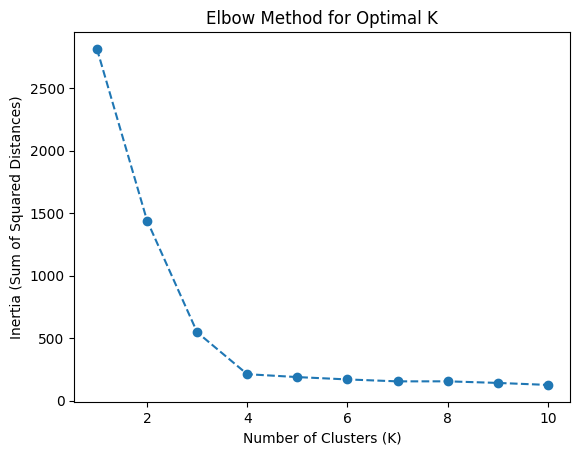

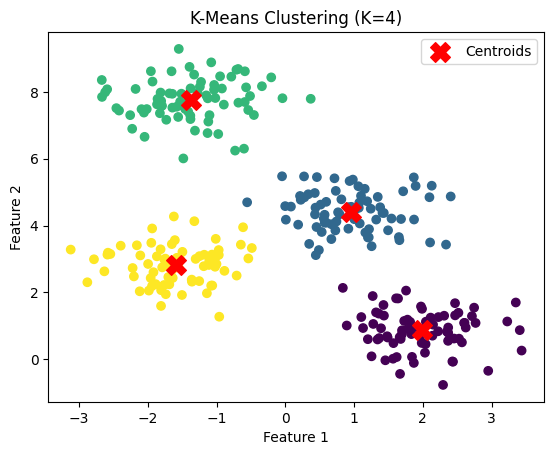

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=30)
plt.title("Generated Data Points")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

inertia_values = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(K_range, inertia_values, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering (K=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


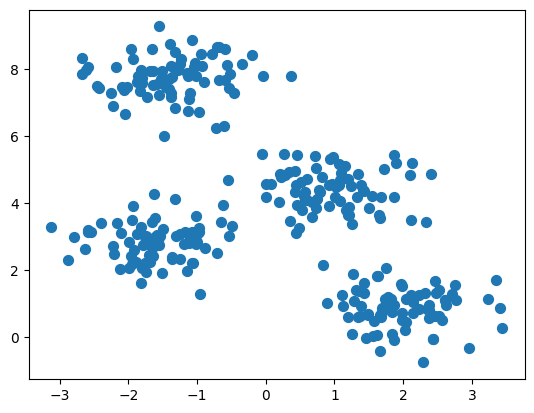

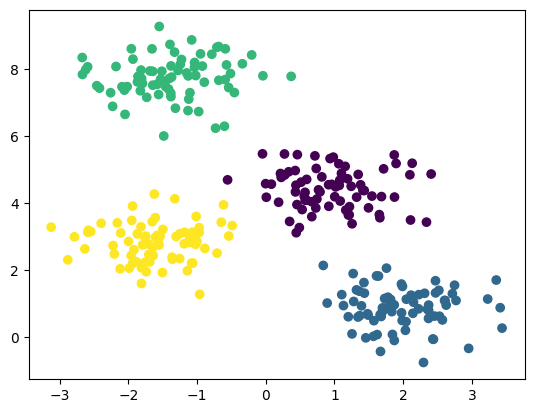

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)

plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='viridis')
plt.show()

Implement all the clustering distance measures (similarity measures) I. Euclidean distance



In [3]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((np.array(p1) - np.array(p2)) ** 2))

points = np.array([
    [2, 3],
    [5, 7],
    [1, 8],
    [6, 2]
])

n = len(points)

distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        distance_matrix[i][j] = euclidean_distance(points[i], points[j])

print("Points:\n", points)
print("\nEuclidean Distance Matrix:\n", distance_matrix)

Points:
 [[2 3]
 [5 7]
 [1 8]
 [6 2]]

Euclidean Distance Matrix:
 [[0.         5.         5.09901951 4.12310563]
 [5.         0.         4.12310563 5.09901951]
 [5.09901951 4.12310563 0.         7.81024968]
 [4.12310563 5.09901951 7.81024968 0.        ]]



ii. Manhattan distance

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def manhattan_distance(p1, p2):
    return np.sum(np.abs(np.array(p1) - np.array(p2)))

points = np.array([
    [2, 3],
    [5, 7],
    [1, 8],
    [6, 2]
])


n = len(points)

distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        distance_matrix[i][j] = manhattan_distance(points[i], points[j])

print("Points:\n", points)
print("\nManhattan Distance Matrix:\n", distance_matrix)

Points:
 [[2 3]
 [5 7]
 [1 8]
 [6 2]]

Manhattan Distance Matrix:
 [[ 0.  7.  6.  5.]
 [ 7.  0.  5.  6.]
 [ 6.  5.  0. 11.]
 [ 5.  6. 11.  0.]]



iii. cosine similarity

In [5]:
import numpy as np

points = np.array([
    [2, 3],
    [5, 7],
    [1, 8],
    [6, 2]
])


def cosine_similarity(p1, p2):
    dot_product = np.dot(p1, p2)
    norm1 = np.linalg.norm(p1)
    norm2 = np.linalg.norm(p2)
    return dot_product / (norm1 * norm2)


n = len(points)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        similarity_matrix[i][j] = cosine_similarity(points[i], points[j])

print("Points:\n", points)
print("\nCosine Similarity Matrix:\n", similarity_matrix)


Points:
 [[2 3]
 [5 7]
 [1 8]
 [6 2]]

Cosine Similarity Matrix:
 [[1.         0.99948011 0.89442719 0.78935222]
 [0.99948011 1.         0.87954345 0.80873608]
 [0.89442719 0.87954345 1.         0.4314555 ]
 [0.78935222 0.80873608 0.4314555  1.        ]]


iv. minkowski



In [6]:
import numpy as np

points = np.array([
    [2, 3],
    [5, 7],
    [1, 8],
    [6, 2]
])

def minkowski_distance(p1, p2, p):
    return np.power(np.sum(np.abs(np.array(p1) - np.array(p2)) ** p), 1/p)

p = 3

n = len(points)
distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        distance_matrix[i][j] = minkowski_distance(points[i], points[j], p)

print("Points:\n", points)
print(f"\nMinkowski Distance Matrix (p={p}):\n", distance_matrix)

Points:
 [[2 3]
 [5 7]
 [1 8]
 [6 2]]

Minkowski Distance Matrix (p=3):
 [[0.         4.49794145 5.01329793 4.02072576]
 [4.49794145 0.         4.02072576 5.01329793]
 [5.01329793 4.02072576 0.         6.98636803]
 [4.02072576 5.01329793 6.98636803 0.        ]]


v. jaccard index



In [7]:
import numpy as np
from sklearn.metrics import jaccard_score

points = np.array([
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0],
    [1, 1, 1, 0]
])

n = len(points)
jaccard_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        jaccard_matrix[i][j] = jaccard_score(points[i], points[j])

print("Binary Points:\n", points)
print("\nPairwise Jaccard Similarity Matrix:\n", jaccard_matrix)

Binary Points:
 [[1 0 1 1]
 [1 1 0 1]
 [0 1 1 0]
 [1 1 1 0]]

Pairwise Jaccard Similarity Matrix:
 [[1.         0.5        0.25       0.5       ]
 [0.5        1.         0.25       0.5       ]
 [0.25       0.25       1.         0.66666667]
 [0.5        0.5        0.66666667 1.        ]]


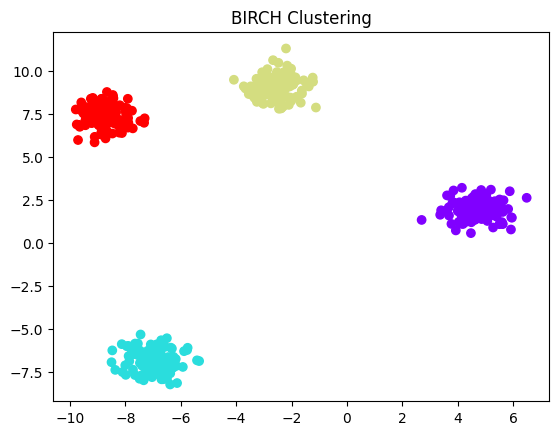

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)

birch_model = Birch(n_clusters=4)
birch_model.fit(X)
labels = birch_model.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("BIRCH Clustering")
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/cluster/_agglomerative.py:325: UserWarning: the number of connected components of the connectivity matrix is 2 > 1. Completing it to avoid stopping the tree early.
  connectivity, n_connected_components = _fix_connectivity(


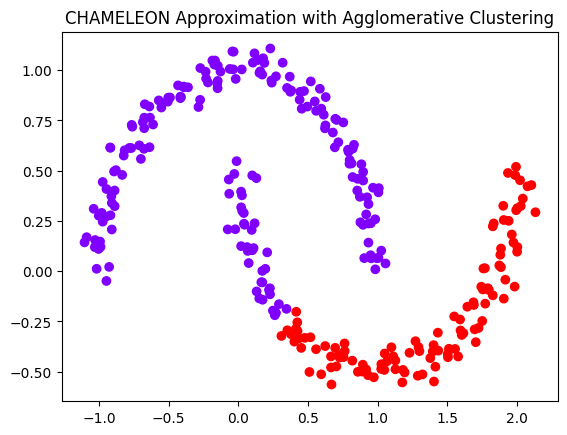

In [9]:
from sklearn.datasets import make_moons
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np

X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

knn_graph = kneighbors_graph(X, n_neighbors=10, include_self=False)

agg_model = AgglomerativeClustering(n_clusters=2, connectivity=knn_graph)
labels = agg_model.fit_predict(X)


plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("CHAMELEON Approximation with Agglomerative Clustering")
plt.show()

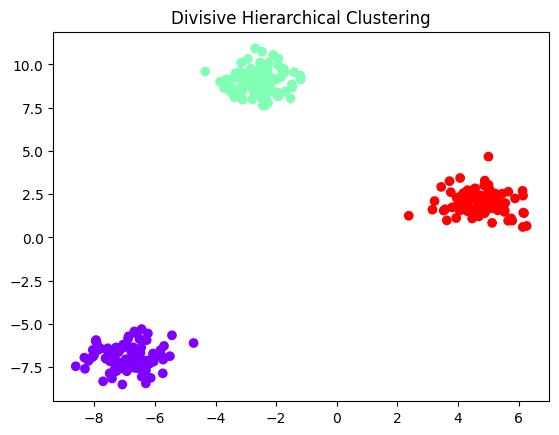

In [10]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.7, random_state=42)

def divisive_clustering(X, n_clusters=3):
    clusters = [X]
    labels = np.zeros(len(X), dtype=int)

    current_label = 0

    while len(clusters) < n_clusters:

        largest_cluster_idx = np.argmax([len(c) for c in clusters])
        cluster_to_split = clusters.pop(largest_cluster_idx)


        kmeans = KMeans(n_clusters=2, random_state=42).fit(cluster_to_split)
        split_labels = kmeans.labels_


        cluster1 = cluster_to_split[split_labels == 0]
        cluster2 = cluster_to_split[split_labels == 1]
        clusters.append(cluster1)
        clusters.append(cluster2)


    for i, cluster in enumerate(clusters):
        for point in cluster:
            idx = np.where((X == point).all(axis=1))[0][0]
            labels[idx] = i

    return labels

labels = divisive_clustering(X, n_clusters=3)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Divisive Hierarchical Clustering")
plt.show()


Implement Types of Linkages Single Linkage Complete Linkage Average Linkage Ward's Linkage Centroid-Linkage

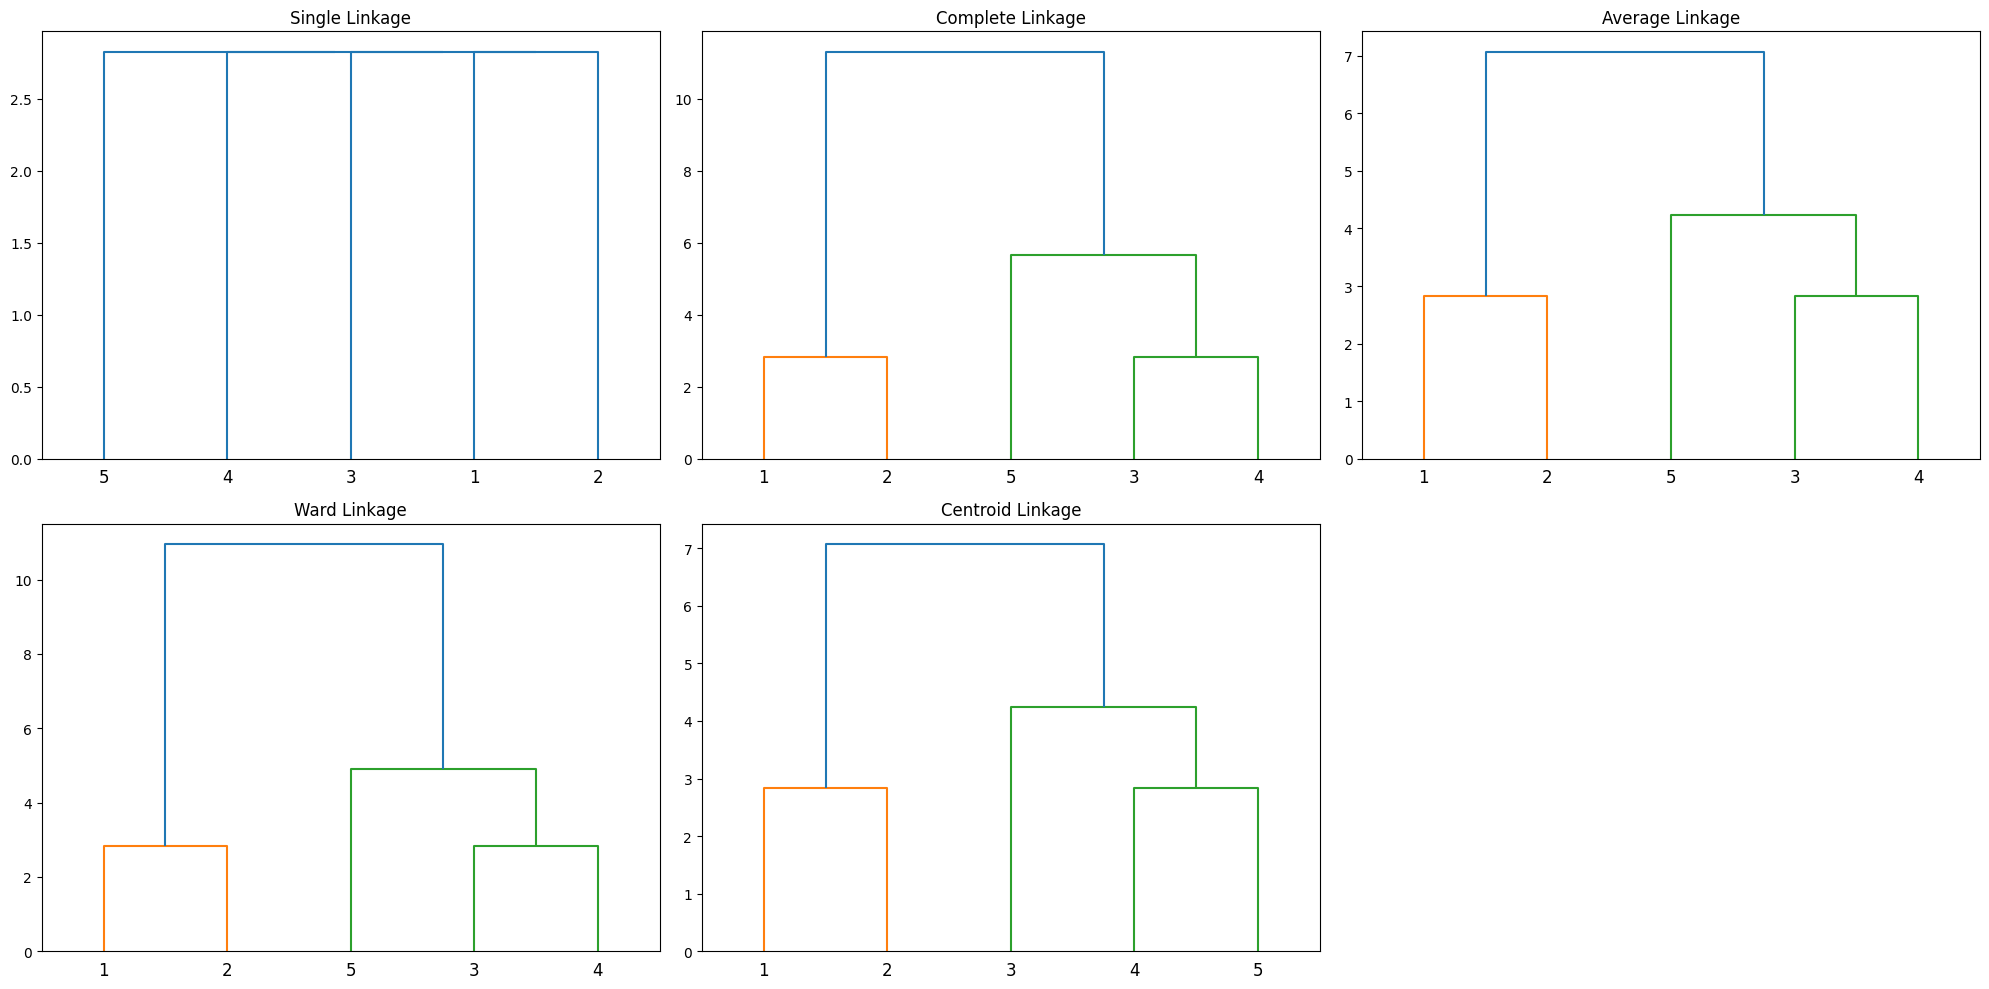

In [11]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

data = np.array([
    [1, 2],
    [3, 4],
    [5, 6],
    [7, 8],
    [9, 10]
])

Z_single = linkage(data, method='single')

Z_complete = linkage(data, method='complete')

Z_average = linkage(data, method='average')

Z_ward = linkage(data, method='ward')

Z_centroid = linkage(data, method='centroid')

methods = ['single', 'complete', 'average', 'ward', 'centroid']
Z_matrices = [Z_single, Z_complete, Z_average, Z_ward, Z_centroid]

plt.figure(figsize=(20, 10))

for i, (method, Z) in enumerate(zip(methods, Z_matrices)):
    plt.subplot(2, 3, i+1)
    dendrogram(Z, labels=np.arange(1, len(data)+1))
    plt.title(f'{method.capitalize()} Linkage')

plt.tight_layout()
plt.show()

Implement DBSCAN clustering



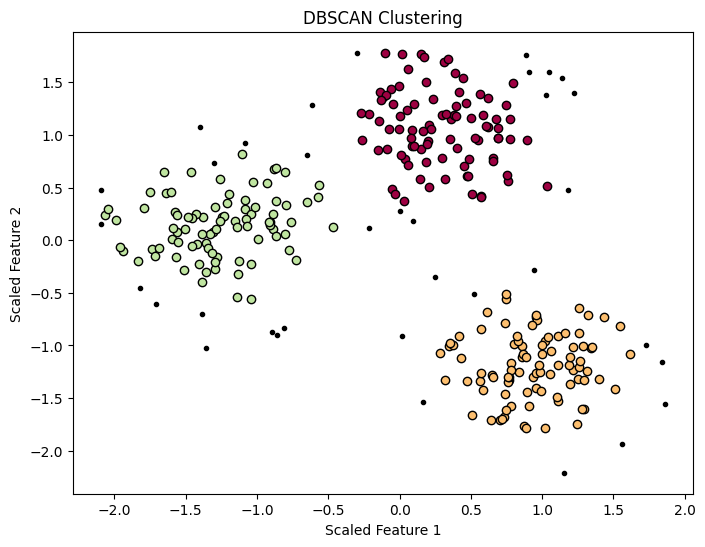

Estimated number of clusters: 3
Estimated number of noise points: 35


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

db = DBSCAN(eps=0.3, min_samples=10)
clusters = db.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = (clusters == k)
    xy = X_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6 if k != -1 else 3)
plt.title('DBSCAN Clustering')
plt.xlabel('Scaled Feature 1')
plt.ylabel('Scaled Feature 2')
plt.show()

n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")



DBSCAN and spectral clustering

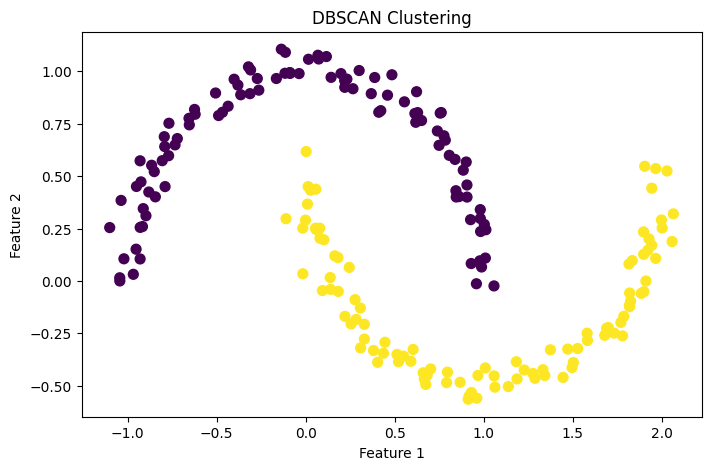

Cluster labels: [0 1]


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


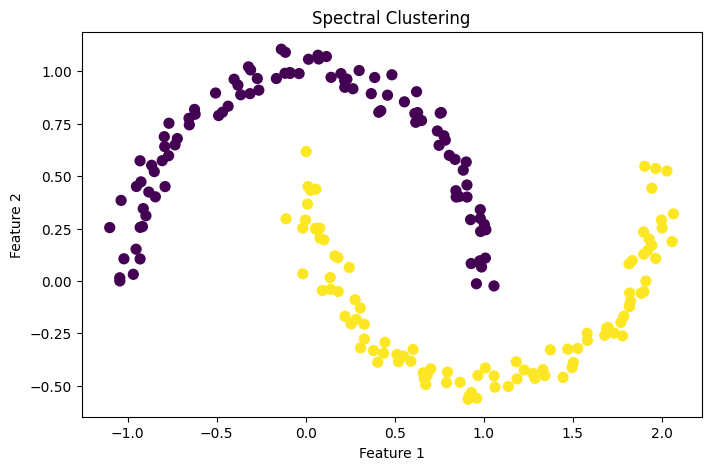

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print("Cluster labels:", np.unique(labels))


from sklearn.cluster import SpectralClustering

spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels_spectral = spectral.fit_predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X[:,0], X[:,1], c=labels_spectral, cmap='viridis', s=50)
plt.title("Spectral Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Implementing spectral clustering

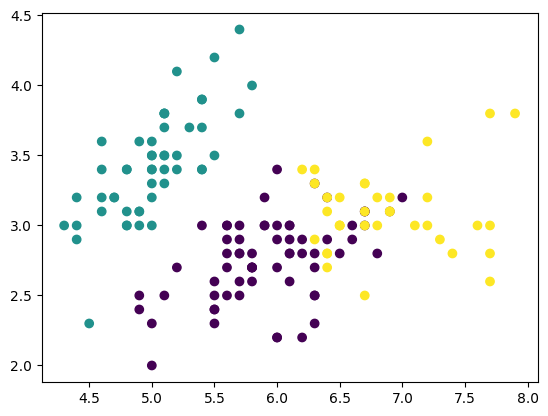

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import SpectralClustering

iris = datasets.load_iris()
X = iris.data
y = iris.target

sc = SpectralClustering(n_clusters=3)

sc.fit(X)

labels = sc.labels_

plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()